In [60]:
#importing required libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("C:\\Users\\yukth\\train_test_network.csv")

In [4]:
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [5]:
df.tail()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
211038,192.168.1.32,48286,176.28.50.165,80,tcp,http,65.376610,2665,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211039,192.168.1.32,48288,176.28.50.165,80,tcp,http,65.710346,1987,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211040,192.168.1.32,48292,176.28.50.165,80,tcp,http,65.766512,3922,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211041,192.168.1.32,48294,176.28.50.165,80,tcp,http,65.753940,2401,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211042,192.168.1.32,48304,176.28.50.165,80,tcp,http,65.771855,3181,322,S3,...,0,0,-,-,-,-,-,-,1,xss


In [6]:
df.dtypes

src_ip                     object
src_port                    int64
dst_ip                     object
dst_port                    int64
proto                      object
service                    object
duration                  float64
src_bytes                   int64
dst_bytes                   int64
conn_state                 object
missed_bytes                int64
src_pkts                    int64
src_ip_bytes                int64
dst_pkts                    int64
dst_ip_bytes                int64
dns_query                  object
dns_qclass                  int64
dns_qtype                   int64
dns_rcode                   int64
dns_AA                     object
dns_RD                     object
dns_RA                     object
dns_rejected               object
ssl_version                object
ssl_cipher                 object
ssl_resumed                object
ssl_established            object
ssl_subject                object
ssl_issuer                 object
http_trans_dep

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211043 entries, 0 to 211042
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  211043 non-null  object 
 1   src_port                211043 non-null  int64  
 2   dst_ip                  211043 non-null  object 
 3   dst_port                211043 non-null  int64  
 4   proto                   211043 non-null  object 
 5   service                 211043 non-null  object 
 6   duration                211043 non-null  float64
 7   src_bytes               211043 non-null  int64  
 8   dst_bytes               211043 non-null  int64  
 9   conn_state              211043 non-null  object 
 10  missed_bytes            211043 non-null  int64  
 11  src_pkts                211043 non-null  int64  
 12  src_ip_bytes            211043 non-null  int64  
 13  dst_pkts                211043 non-null  int64  
 14  dst_ip_bytes        

In [8]:
df.shape

(211043, 44)

In [9]:
# List of columns to remove
unwanted_columns = ['dns_query', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',	'ssl_established',	'ssl_subject',	'ssl_issuer',	'http_trans_depth',	'http_method',	'http_uri',	'http_version' ]

In [10]:
df.drop(columns = unwanted_columns, inplace=True)

In [11]:
df.head()
#we can see the coloums got deleted ----- before it was 44 columns--not it is 29

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [12]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (20612, 29)


In [13]:
df.count()      # Used to count the number of rows

src_ip                    211043
src_port                  211043
dst_ip                    211043
dst_port                  211043
proto                     211043
service                   211043
duration                  211043
src_bytes                 211043
dst_bytes                 211043
conn_state                211043
missed_bytes              211043
src_pkts                  211043
src_ip_bytes              211043
dst_pkts                  211043
dst_ip_bytes              211043
dns_qclass                211043
dns_qtype                 211043
dns_rcode                 211043
http_request_body_len     211043
http_response_body_len    211043
http_status_code          211043
http_user_agent           211043
http_orig_mime_types      211043
http_resp_mime_types      211043
weird_name                211043
weird_addl                211043
weird_notice              211043
label                     211043
type                      211043
dtype: int64

In [14]:
#So seen above there are 211043 rows and we are removing 20569 rows of duplicate data.

In [15]:
df = df.drop_duplicates()
df.head(5)

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [16]:
df.count()

src_ip                    190431
src_port                  190431
dst_ip                    190431
dst_port                  190431
proto                     190431
service                   190431
duration                  190431
src_bytes                 190431
dst_bytes                 190431
conn_state                190431
missed_bytes              190431
src_pkts                  190431
src_ip_bytes              190431
dst_pkts                  190431
dst_ip_bytes              190431
dns_qclass                190431
dns_qtype                 190431
dns_rcode                 190431
http_request_body_len     190431
http_response_body_len    190431
http_status_code          190431
http_user_agent           190431
http_orig_mime_types      190431
http_resp_mime_types      190431
weird_name                190431
weird_addl                190431
weird_notice              190431
label                     190431
type                      190431
dtype: int64

In [17]:
print(df.isnull().sum())

src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
http_request_body_len     0
http_response_body_len    0
http_status_code          0
http_user_agent           0
http_orig_mime_types      0
http_resp_mime_types      0
weird_name                0
weird_addl                0
weird_notice              0
label                     0
type                      0
dtype: int64


In [18]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

src_ip : ['192.168.1.37' '192.168.1.193' '192.168.1.33' '192.168.1.30'
 '192.168.1.31' '192.168.1.38' '192.168.1.34' '192.168.1.39'
 '192.168.1.190' '220.158.215.20' '192.168.1.152' '192.168.1.169'
 '192.168.1.195' '192.168.1.1' '192.168.1.79' '192.168.1.250'
 '192.168.1.133' '192.168.1.192' '192.168.1.103' '192.168.1.46'
 '192.168.1.194' '192.168.1.17' '192.168.1.191'
 '2405:6e00:10ce:2c00:20c:29ff:feee:e07a' 'fe80::8520:4eba:6770:702a'
 'fe80::855:e4ef:de26:7aca' 'fe80::1087:c341:7263:ead3'
 'fe80::601f:9cde:4832:2f3f' 'fe80::f554:8774:9968:b60b'
 'fe80::343b:2cf:e9fb:6570' '2405:6e00:10ce:2c00:9064:17:85d2:57d4'
 '2405:6e00:10ce:2c00:c058:dbaa:f212:a2d8'
 '2405:6e00:10ce:2c00:20c:29ff:fed2:b002' '192.168.1.6'
 'fe80::ee1f:72ff:fef1:286d' 'fe80::76:ad3e:1329:a7fd'
 'fe80::e4a6:b91f:48f3:ac01' '2405:6e00:10ce:2c00:8520:4eba:6770:702a'
 '172.17.0.8' '172.17.0.5' '192.168.1.180' '172.17.0.7' '192.168.1.186'
 '192.168.1.49' '199.115.158.193' 'fe80::ffff:ffff:ffff' '192.168.1.184'
 '13.55

In [19]:
df = df.dropna()    # Dropping the missing values.
df.count()

src_ip                    190431
src_port                  190431
dst_ip                    190431
dst_port                  190431
proto                     190431
service                   190431
duration                  190431
src_bytes                 190431
dst_bytes                 190431
conn_state                190431
missed_bytes              190431
src_pkts                  190431
src_ip_bytes              190431
dst_pkts                  190431
dst_ip_bytes              190431
dns_qclass                190431
dns_qtype                 190431
dns_rcode                 190431
http_request_body_len     190431
http_response_body_len    190431
http_status_code          190431
http_user_agent           190431
http_orig_mime_types      190431
http_resp_mime_types      190431
weird_name                190431
weird_addl                190431
weird_notice              190431
label                     190431
type                      190431
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190431 entries, 0 to 211042
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  190431 non-null  object 
 1   src_port                190431 non-null  int64  
 2   dst_ip                  190431 non-null  object 
 3   dst_port                190431 non-null  int64  
 4   proto                   190431 non-null  object 
 5   service                 190431 non-null  object 
 6   duration                190431 non-null  float64
 7   src_bytes               190431 non-null  int64  
 8   dst_bytes               190431 non-null  int64  
 9   conn_state              190431 non-null  object 
 10  missed_bytes            190431 non-null  int64  
 11  src_pkts                190431 non-null  int64  
 12  src_ip_bytes            190431 non-null  int64  
 13  dst_pkts                190431 non-null  int64  
 14  dst_ip_bytes            1

In [21]:
print(df.isnull().sum())   # After dropping the values

src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
http_request_body_len     0
http_response_body_len    0
http_status_code          0
http_user_agent           0
http_orig_mime_types      0
http_resp_mime_types      0
weird_name                0
weird_addl                0
weird_notice              0
label                     0
type                      0
dtype: int64


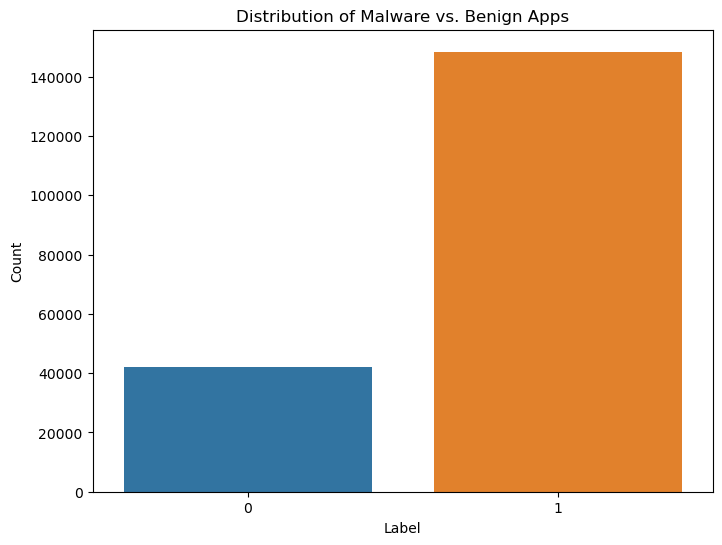

In [22]:
# Distribution of the target variable 'label'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Distribution of Malware vs. Benign Apps')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

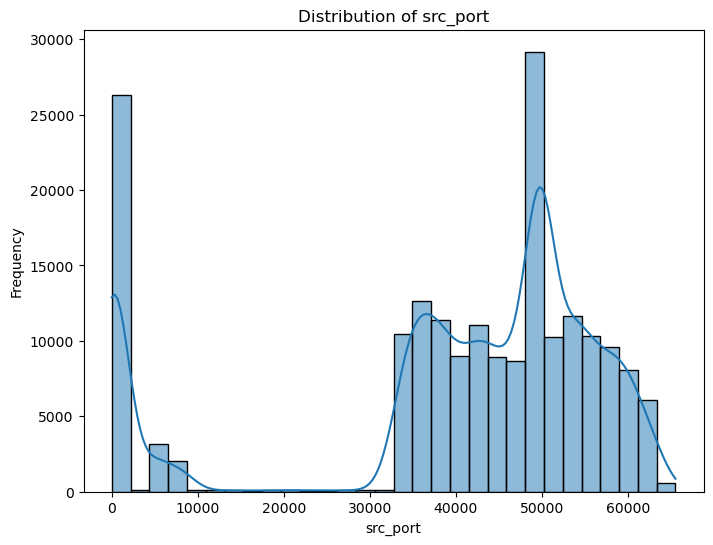

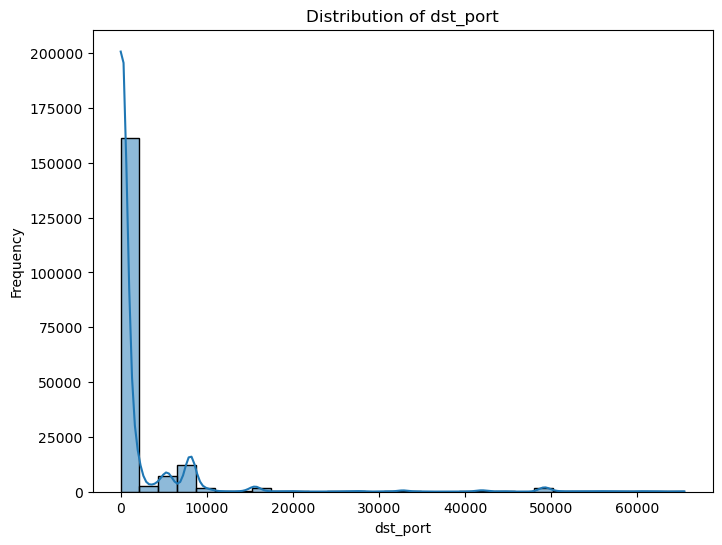

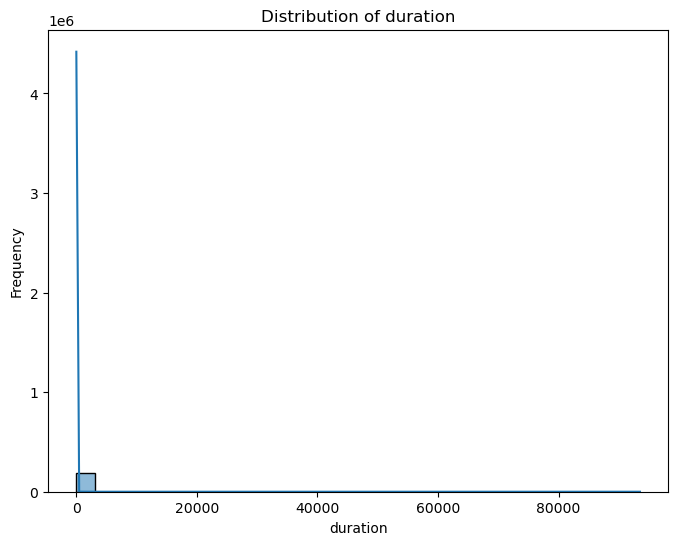

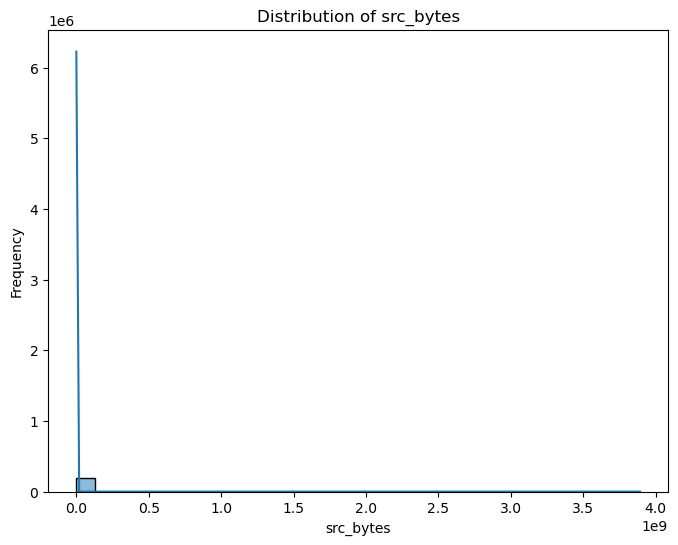

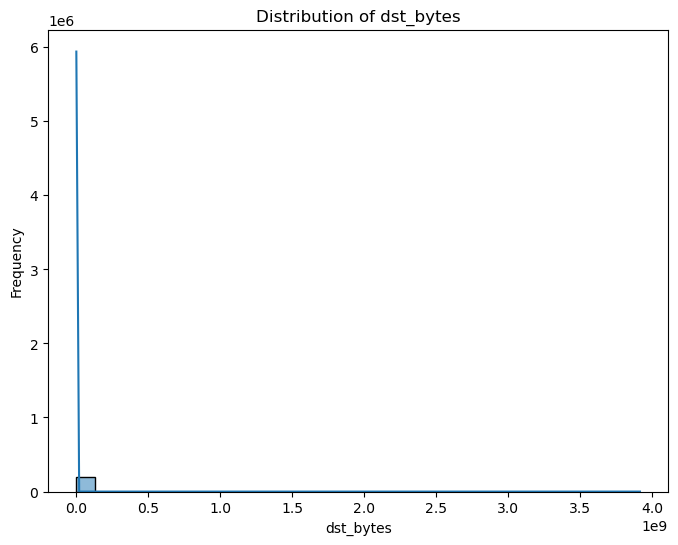

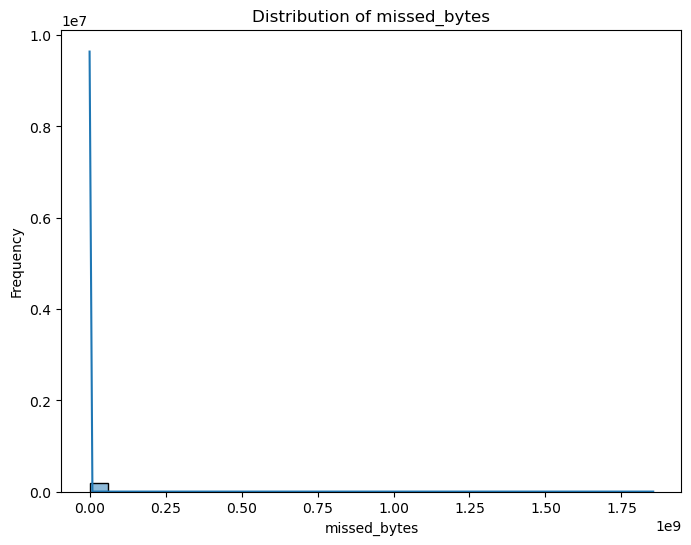

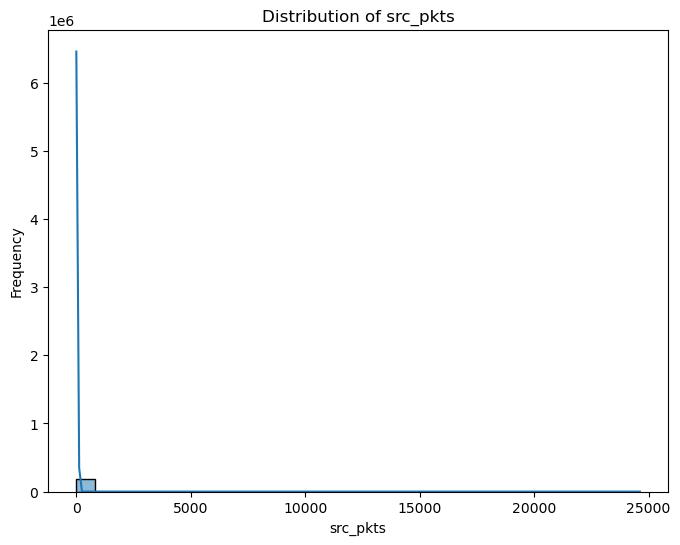

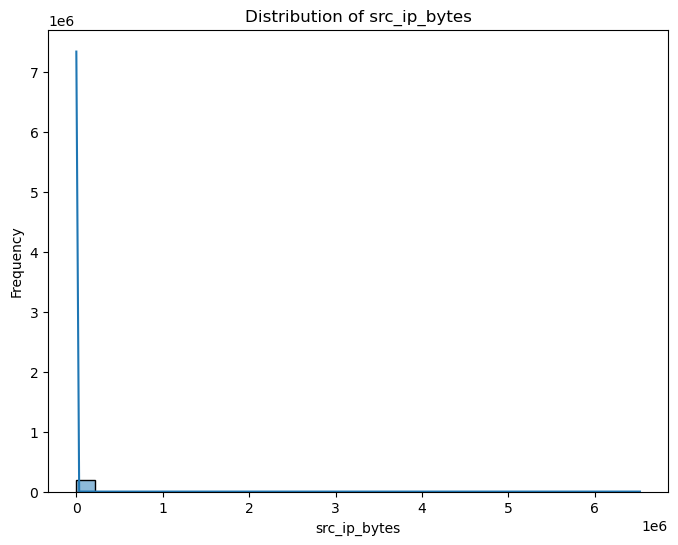

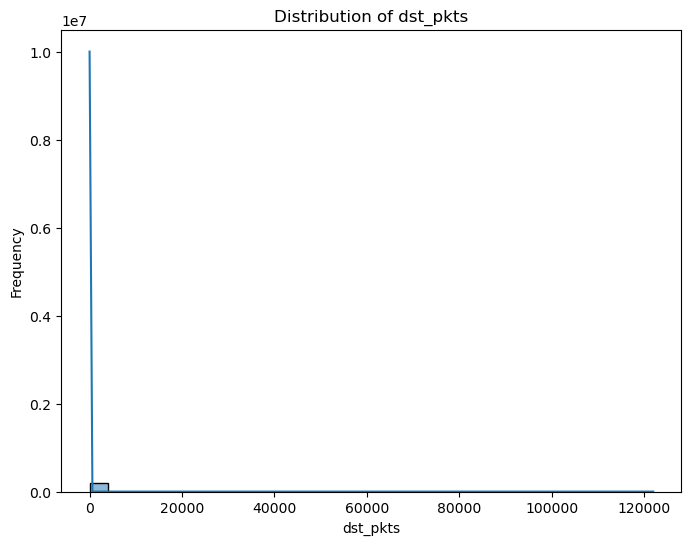

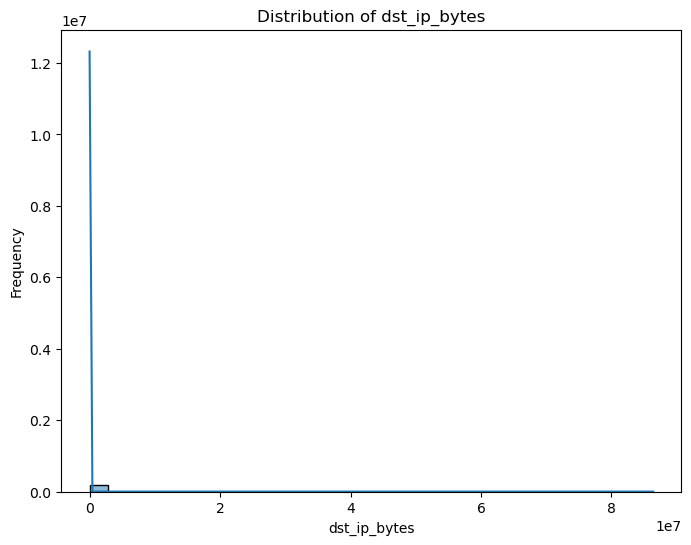

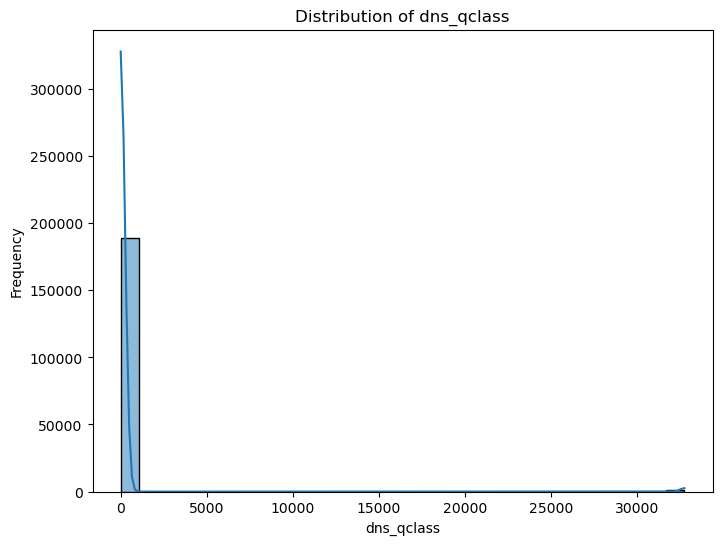

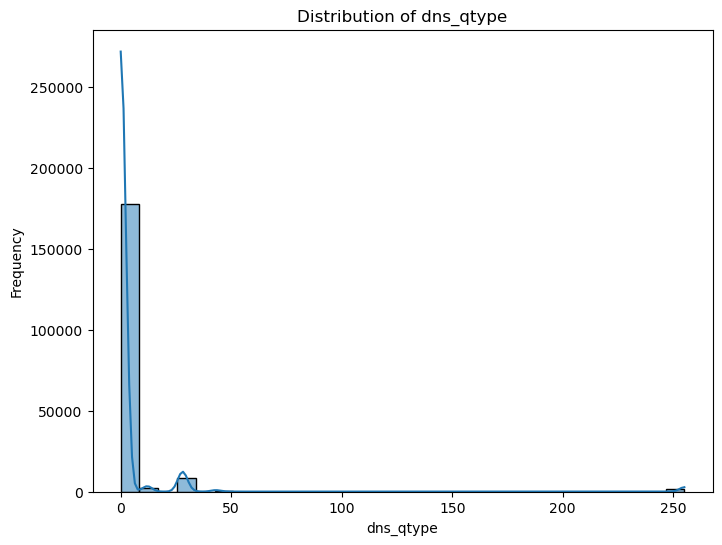

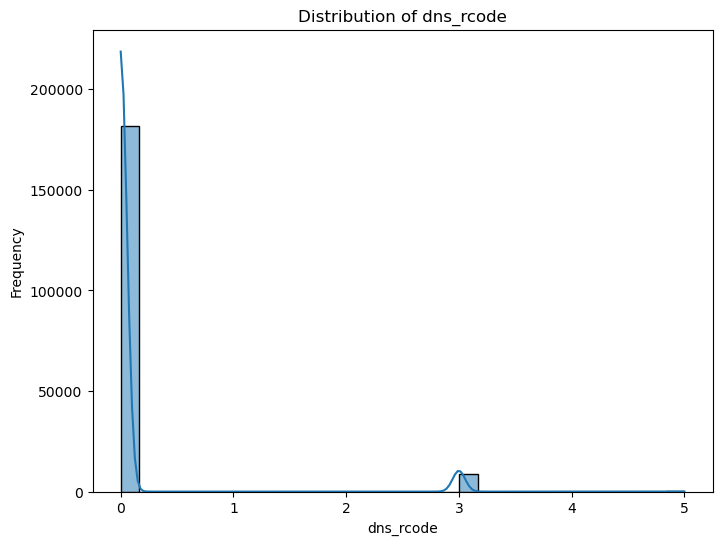

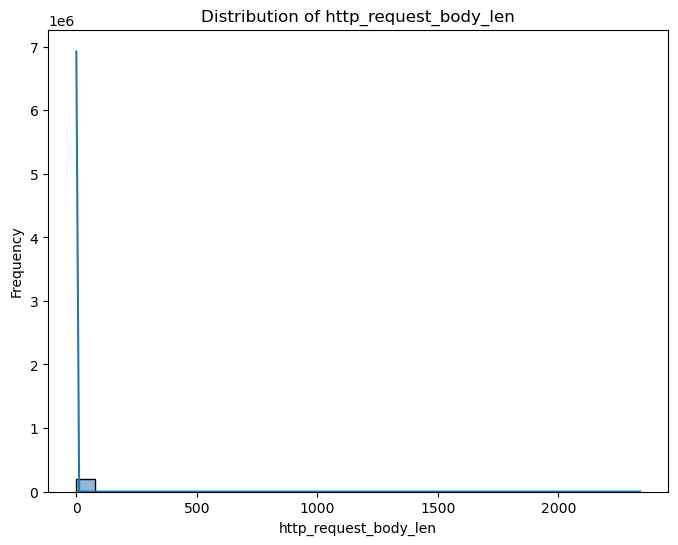

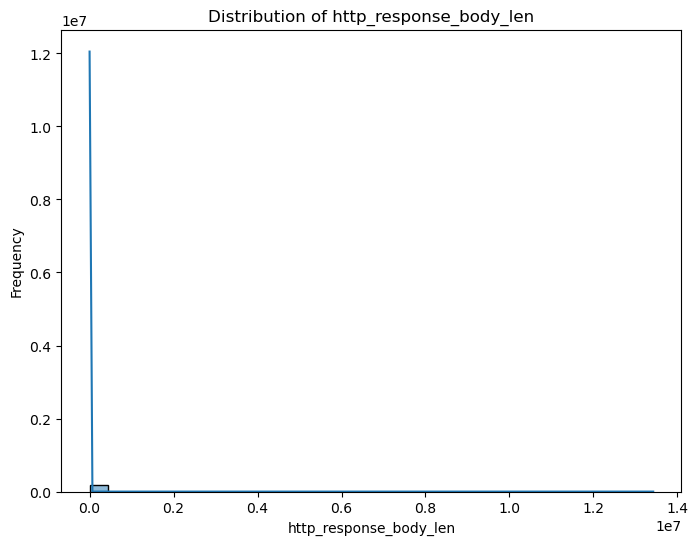

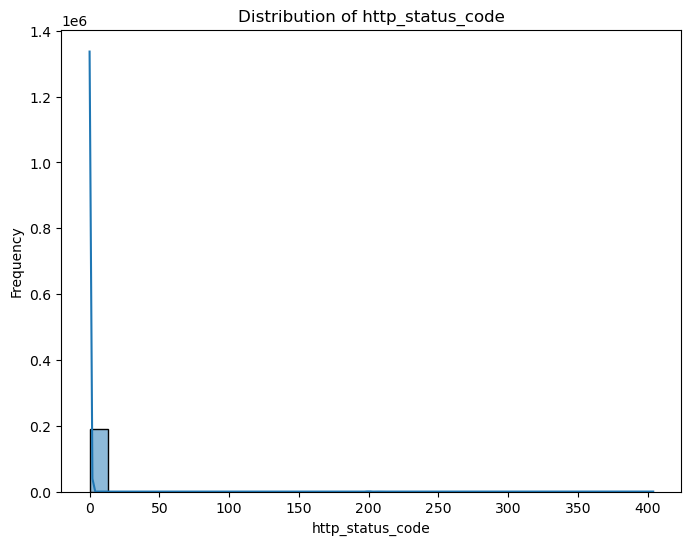

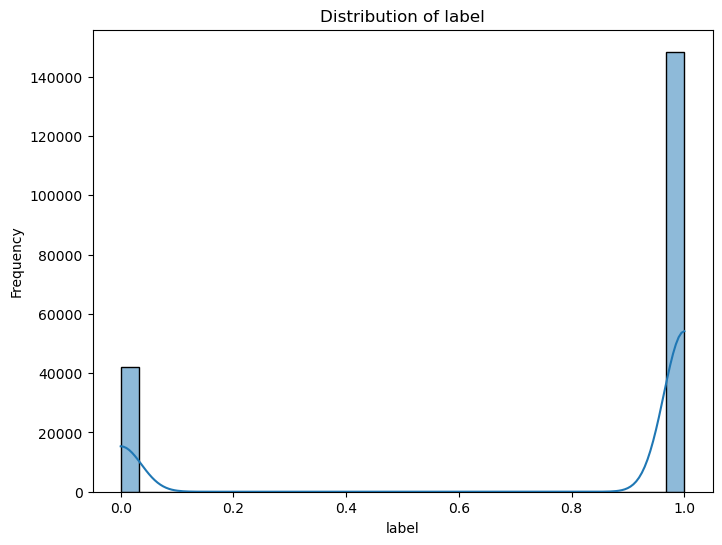

In [23]:
# Visualize the distribution of numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

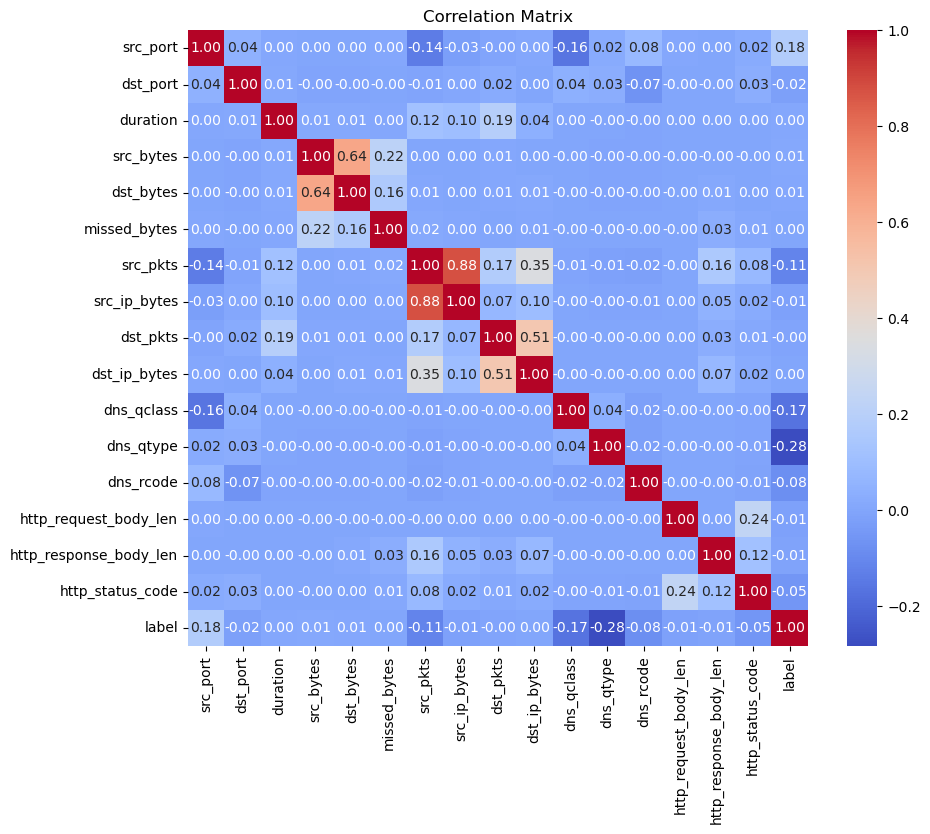

In [24]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='src_ip_bytes'>

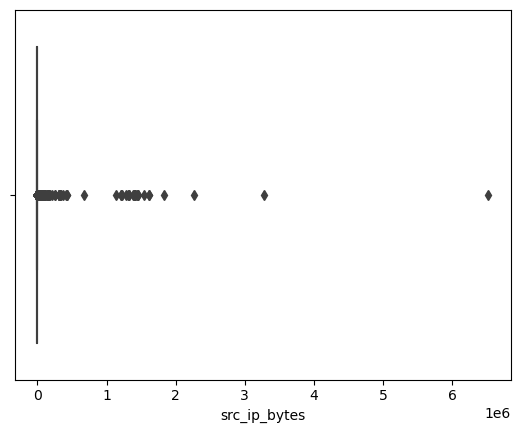

In [25]:
sns.boxplot(x=df['src_ip_bytes'])

<Axes: xlabel='dst_ip_bytes'>

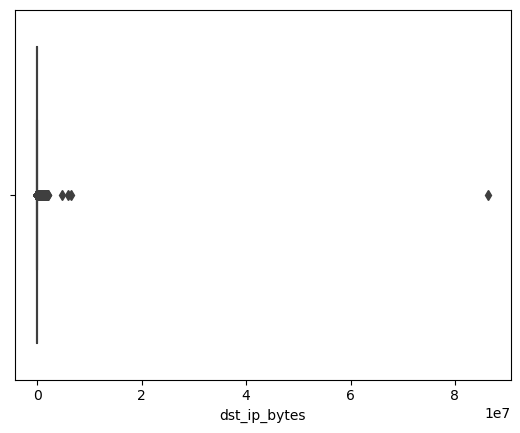

In [26]:
sns.boxplot(x=df['dst_ip_bytes'])

In [27]:
#splitting datasets---tried

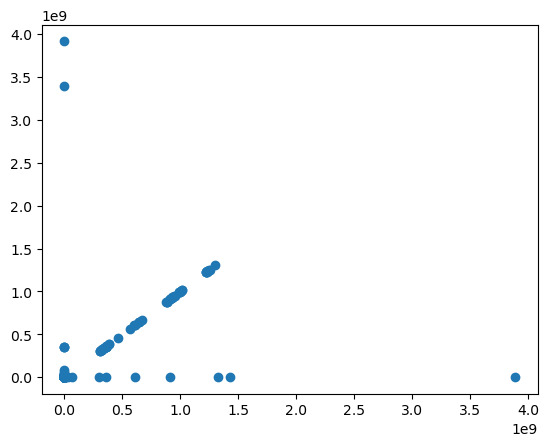

In [28]:
plt.scatter(df['src_bytes'], df['dst_bytes'])

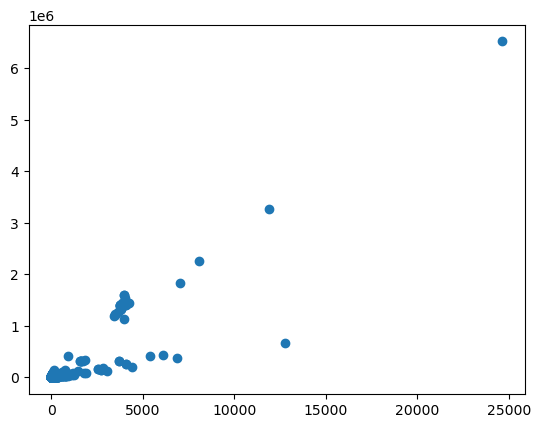

In [29]:
plt.scatter(df['src_pkts'], df['src_ip_bytes'])

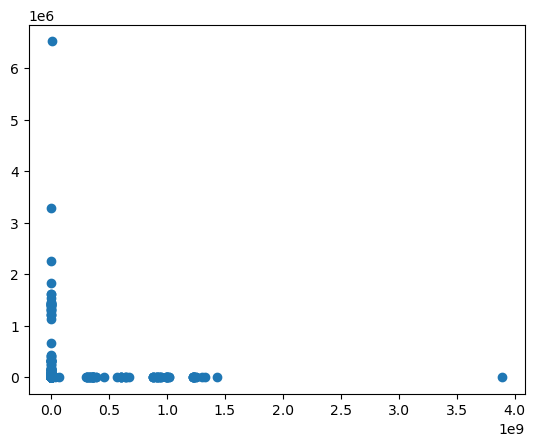

In [30]:
plt.scatter(df['src_bytes'], df['src_ip_bytes'])

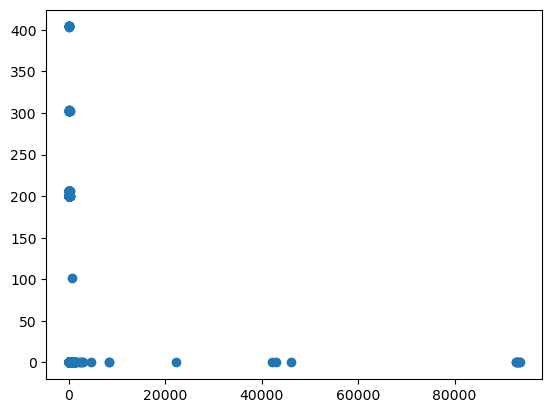

In [31]:
plt.scatter(df['duration'], df['http_status_code'])

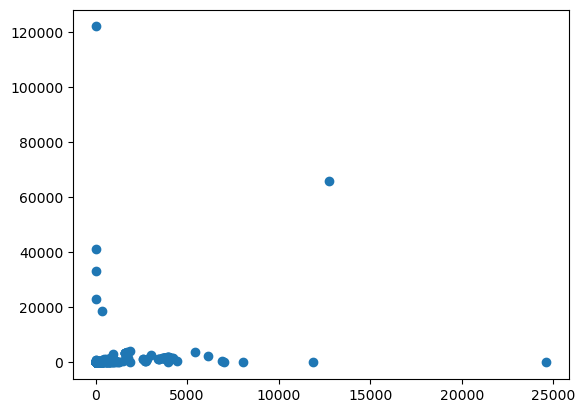

In [32]:
plt.scatter(df['src_pkts'], df['dst_pkts'])

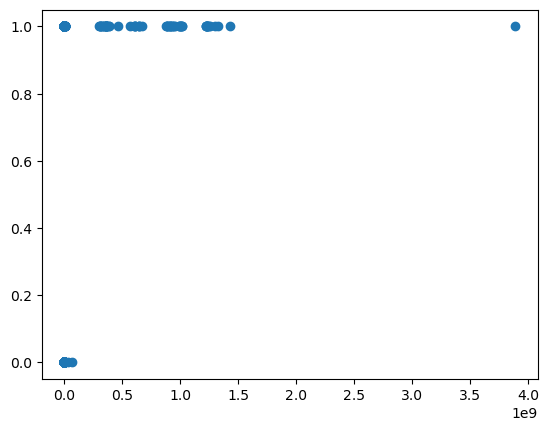

In [32]:
plt.scatter(df['src_bytes'], df['label'])

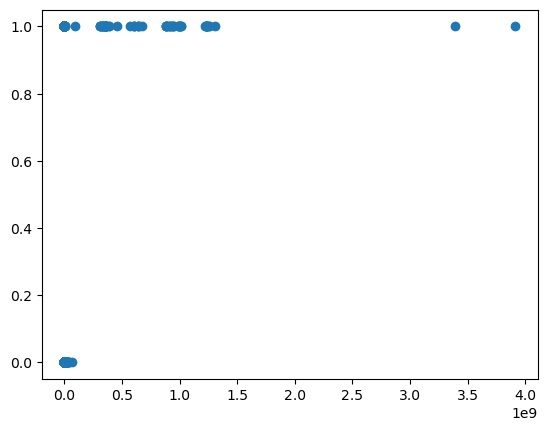

In [33]:
plt.scatter(df['dst_bytes'], df['label'])

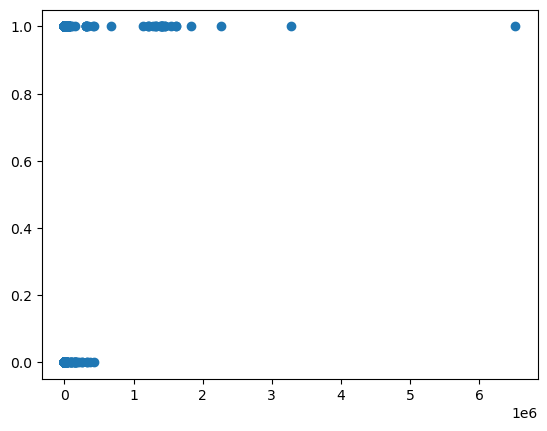

In [34]:
plt.scatter(df['src_ip_bytes'], df['label'])

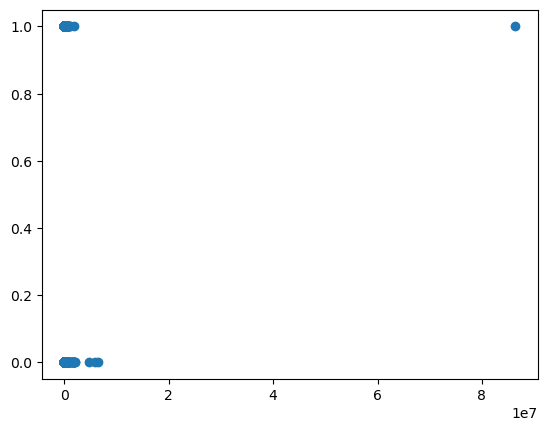

In [35]:
plt.scatter(df['dst_ip_bytes'], df['label'])

In [39]:
X = df['src_pkts']
#"src pckts" likely refers to "source packets." 
#Source packets are the data packets that are sent from a source device (such as a computer or server) to a destination device over a network.
y = df['src_ip_bytes']

In [40]:
X

0         108
1           1
2           1
3           1
4           1
         ... 
211038      5
211039      6
211040      7
211041      6
211042      7
Name: src_pkts, Length: 190431, dtype: int64

In [41]:
y

0         108064
1             52
2             52
3             48
4             52
           ...  
211038      2925
211039      2307
211040      4294
211041      2721
211042      3553
Name: src_ip_bytes, Length: 190431, dtype: int64

Text(0, 0.5, 'Souce IP bytes')

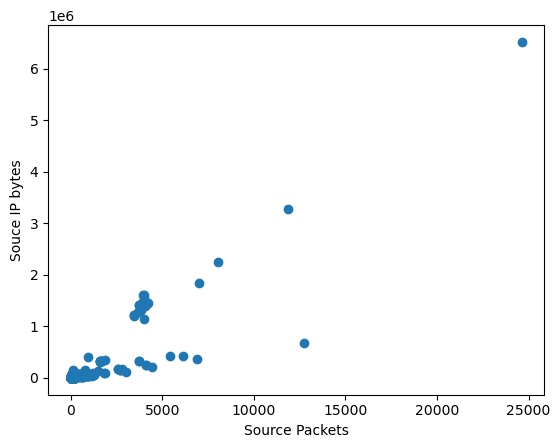

In [42]:
plt.scatter(X, y)
plt.xlabel('Source Packets')
plt.ylabel('Souce IP bytes')

In [43]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4)
#test_size = 0.05 specifies only 20% of the whole data is taken as our test set, and 80% as our train set
#The train_test_split() method is used to split our data into train and test sets. 
#First, we need to divide our data into features (X) and labels (y).
#the dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model.
#The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels.
#we can explicitly test the size of the train and test sets. It is suggested to keep our train sets larger than the test sets.
#randon state will give the same samples, as the test samples will change whenever u execute them


#Train set: The training dataset is a set of data that was utilized to fit the model. 
#The dataset on which the model is trained. This data is seen and learned by the model.

#Test set: The test dataset is a subset of the training dataset that is utilized to give an accurate evaluation of a final model fit.

#validation set:  A validation dataset is a sample of data from your model’s training set that is used to estimate model performance while tuning the model’s hyperparameters.

In [44]:
X_train

40863       1
130508    120
6473        1
45122       2
43923       8
         ... 
8972        1
181959      2
123544    120
171131      1
135445      5
Name: src_pkts, Length: 114258, dtype: int64

In [45]:
X_train = np.array(X_train).reshape(-1,1)
#converting the one dimensional X_train data into two dimensional
X_train

array([[  1],
       [120],
       [  1],
       ...,
       [120],
       [  1],
       [  5]], dtype=int64)

In [46]:
X_test

12554     1
182703    1
149919    5
159884    0
96616     2
         ..
164812    0
6361      1
27488     2
37860     1
30892     1
Name: src_pkts, Length: 76173, dtype: int64

In [44]:
X_test = np.array(X_test).reshape(-1,1)
#converting the one dimensional X_train data into two dimensional
X_test

array([[1],
       [6],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
c = lr.intercept_
c

-1219.0032216382378

In [48]:
m = lr.coef_
m

array([193.61489405])

In [49]:
Y_pred_train = m*X_train + c
Y_pred_train

array([[-1025.38832759],
       [-1025.38832759],
       [-1219.00322164],
       ...,
       [-1025.38832759],
       [-1025.38832759],
       [-1025.38832759]])

In [50]:
#we already had a formula for prediction in sklearn
Y_pred_train1 = lr.predict(X_train)
Y_pred_train1

array([-1025.38832759, -1025.38832759, -1219.00322164, ...,
       -1025.38832759, -1025.38832759, -1025.38832759])

Text(0, 0.5, 'Destination bytes')

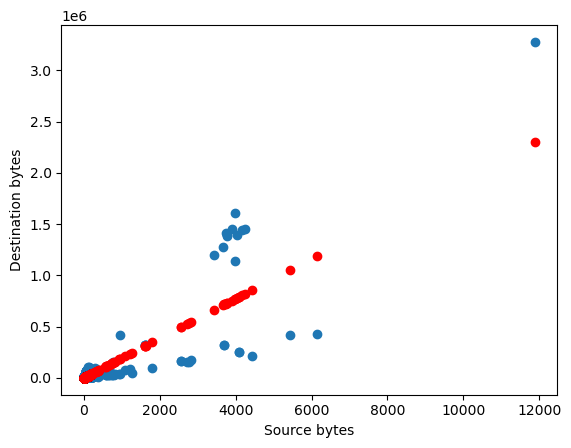

In [51]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, Y_pred_train1, color = 'Red')
plt.xlabel('Source bytes')
plt.ylabel('Destination bytes')

In [52]:
#we have done this on train, now do this on test 
Y_pred_test1 = lr.predict(X_test)
Y_pred_test1

array([-1025.38832759,   -57.31385733, -1025.38832759, ...,
       -1025.38832759, -1219.00322164, -1025.38832759])

Text(0, 0.5, 'Destination bytes')

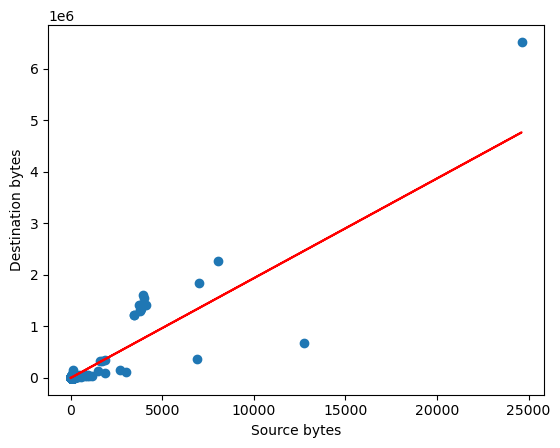

In [53]:
#it did predicted something lets check , how good the plot is?
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred_test1, color = 'Red')
plt.xlabel('Source bytes')
plt.ylabel('Destination bytes')

In [54]:
#it was able to find the best fit line for the X_test s well though the linear regression model never have seen the X_test

In [55]:
r2_score_value = r2_score(y_test, Y_pred_test1)
print("R2 Score:", r2_score_value)

R2 Score: 0.8001773577506824


In [56]:
#R2 score close to 1: Indicates that the model explains a large proportion of the variability in the target variable and is generally considered good.


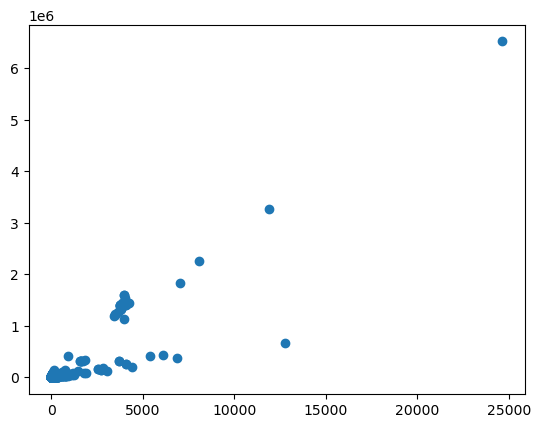

In [63]:
import matplotlib.pyplot as plt
plt.scatter(df['src_pkts'], df['src_ip_bytes'])

In [64]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [65]:
y_predicted = km.fit_predict(df[["src_pkts","src_ip_bytes"]])
y_predicted

C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 0, 0, 0])

In [66]:
df["cluster"] = y_predicted
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type,cluster
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,-,-,-,-,-,-,1,backdoor,0
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,-,-,-,-,-,-,1,backdoor,0
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,-,-,-,-,-,-,1,backdoor,0
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,-,-,-,-,-,-,1,backdoor,0
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,-,-,-,-,-,-,1,backdoor,0


In [67]:
km.cluster_centers_

array([[9.86693171e+00, 6.23043586e+02],
       [4.48345833e+03, 1.51349625e+06],
       [2.46230000e+04, 6.52262600e+06]])

Text(0, 0.5, 'src_ip_bytes')

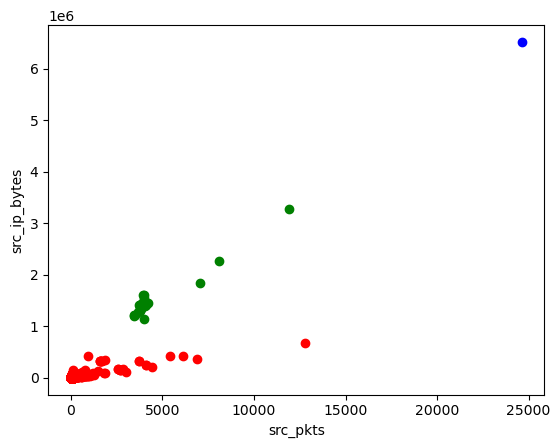

In [68]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


plt.scatter(df1["src_pkts"], df1["src_ip_bytes"], color = "red")
plt.scatter(df2["src_pkts"], df2["src_ip_bytes"], color = "green")
plt.scatter(df3["src_pkts"], df3["src_ip_bytes"], color = "blue")


plt.xlabel("src_pkts")
plt.ylabel("src_ip_bytes")

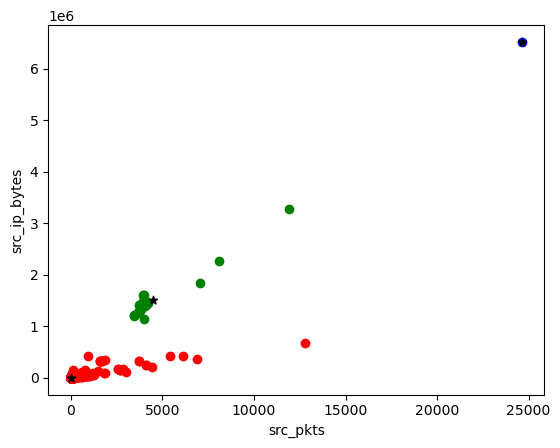

In [69]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


plt.scatter(df1["src_pkts"], df1["src_ip_bytes"], color = "red")
plt.scatter(df2["src_pkts"], df2["src_ip_bytes"], color = "green")
plt.scatter(df3["src_pkts"], df3["src_ip_bytes"], color = "blue")


plt.xlabel("src_pkts")
plt.ylabel("src_ip_bytes")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "black", marker = "*")

In [70]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[["src_pkts","src_ip_bytes"]])
    sse.append(km.inertia_)

C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [71]:
sse

[104911398629471.22,
 31540690269491.367,
 7452575274151.3955,
 4012077294292.1353,
 1943308997525.9507,
 1314316071952.2412,
 1002003351651.3958,
 694069827475.4191,
 483698732180.4891]

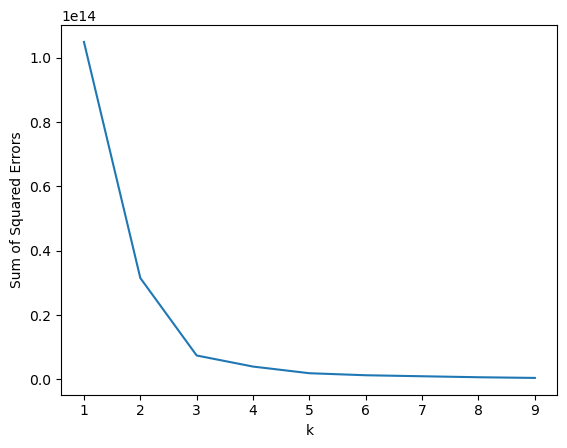

In [72]:
plt.xlabel("k")
plt.ylabel("Sum of Squared Errors")
plt.plot(k_rng,sse)

In [61]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [62]:
#Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
import numpy as np

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test.values.reshape(-1, 1))


In [51]:
from sklearn.metrics import accuracy_score

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3107531540046998


In [53]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:


C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3972
          28       0.00      0.00      0.00         6
          40       0.00      0.00      0.00      5388
          43       0.00      0.00      0.00         4
          44       0.00      0.00      0.00      7559
          48       0.21      1.00      0.34      7284
          50       0.00      0.00      0.00         7
          51       0.00      0.00      0.00         1
          52       0.00      0.00      0.00      3238
          53       0.00      0.00      0.00         5
          54       0.00      0.00      0.00       102
          55       0.00      0.00      0.00         3
          56       0.00      0.00      0.00        31
          57       0.00      0.00      0.00        46
          58       0.00      0.00      0.00        20
          59       0.00      0.00      0.00       703
          60       0.00      0.00      0.00      2782
          61       0.00    

C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\metrics\_cla